In [5]:
import cv2
import PIL
import numpy as np
import math
import matplotlib.pyplot as plt

In [6]:
x=cv2.imread("dataset/Lana.jpg")

In [7]:
def image_quantizer(img,B,L):
    height,width,channels=img.shape
    Q=np.zeros((256,))
    y=np.zeros((height,width))
    q=B/L
    for i in range(0,255):
        Q[i+1]=math.floor(i/q)*q+(q/2)
    for i in range(1,height):
        for j in range(1,width):
            y[i][j]=Q[x[i][j]+1][1]
            
    plt.imshow(y)
    plt.show()

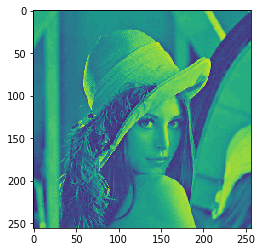

In [8]:
image_quantizer(x,256,32)

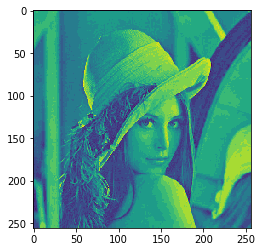

In [9]:
image_quantizer(x,256,16)

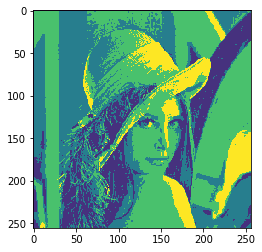

In [10]:
image_quantizer(x,256,4)

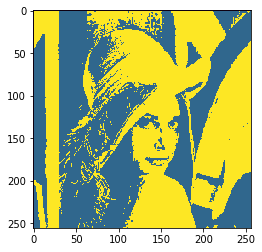

In [11]:
image_quantizer(x,256,2)

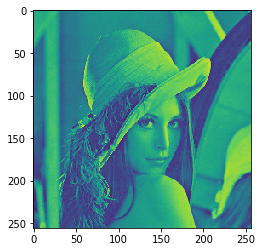

In [12]:
image_quantizer(x,256,64)

In [13]:
height,width,channels=x.shape
y=np.zeros((height,width))
for i in range(0,height):
    for j in range(0,width):
        for k in range(0,channels):
            if(x[i][j][k]<128):
                y[i][j]=0
            else:
                y[i][j]=1
            

In [14]:
from sklearn.metrics.pairwise import euclidean_distances
euclidean_distances(y,y)

array([[ 0.        ,  3.46410162,  4.47213595, ..., 10.04987562,
        10.04987562,  9.89949494],
       [ 3.46410162,  0.        ,  3.46410162, ...,  9.74679434,
         9.8488578 ,  9.59166305],
       [ 4.47213595,  3.46410162,  0.        , ...,  9.8488578 ,
         9.94987437,  9.59166305],
       ...,
       [10.04987562,  9.74679434,  9.8488578 , ...,  0.        ,
         3.46410162,  4.58257569],
       [10.04987562,  9.8488578 ,  9.94987437, ...,  3.46410162,
         0.        ,  3.31662479],
       [ 9.89949494,  9.59166305,  9.59166305, ...,  4.58257569,
         3.31662479,  0.        ]])

In [15]:
from scipy.spatial import distance
distance.cdist(y,y)

array([[ 0.        ,  3.46410162,  4.47213595, ..., 10.04987562,
        10.04987562,  9.89949494],
       [ 3.46410162,  0.        ,  3.46410162, ...,  9.74679434,
         9.8488578 ,  9.59166305],
       [ 4.47213595,  3.46410162,  0.        , ...,  9.8488578 ,
         9.94987437,  9.59166305],
       ...,
       [10.04987562,  9.74679434,  9.8488578 , ...,  0.        ,
         3.46410162,  4.58257569],
       [10.04987562,  9.8488578 ,  9.94987437, ...,  3.46410162,
         0.        ,  3.31662479],
       [ 9.89949494,  9.59166305,  9.59166305, ...,  4.58257569,
         3.31662479,  0.        ]])

In [19]:
def averaging_filter(x,dimensions):
    height,width,channels=x.shape
    mask=np.ones((dimensions,dimensions),dtype=int)
    mask=mask/9
    img_new=np.zeros((height,width))
    for i in range(1, height-1): 
        for j in range(1, width-1): 
            temp = x[i-1, j-1]*mask[0, 0]+x[i-1, j]*mask[0, 1]+x[i-1, j + 1]*mask[0, 2]+x[i, j-1]*mask[1, 0]+ x[i, j]*mask[1, 1]+x[i, j + 1]*mask[1, 2]+x[i + 1, j-1]*mask[2, 0]+x[i + 1, j]*mask[2, 1]+x[i + 1, j + 1]*mask[2, 2] 
            img_new[i][j]= temp[0]
            
    img_new = img_new.astype(np.uint8)
    plt.imshow(img_new)
    plt.show()

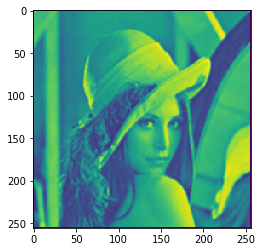

In [20]:
averaging_filter(x,3)

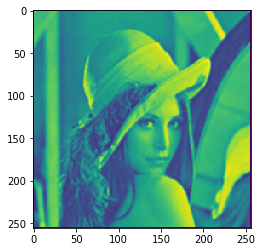

In [21]:
averaging_filter(x,5)

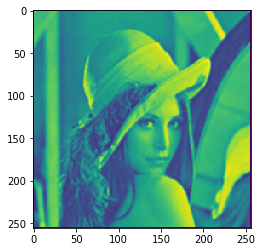

In [22]:
averaging_filter(x,7)